In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

In [3]:
np.random.seed(2222)
T, _ = np.linalg.qr(np.random.rand(5,5))
A = T.T @ np.diag([5,4,3,2,1]) @ T
print(A.T - A)
w, v = np.linalg.eig(A)
np.set_printoptions(precision=2)
print(w)
for ww in w:
    print(ww, np.abs(ww))
print(v)

[[ 0.00e+00  0.00e+00 -2.22e-16  0.00e+00 -2.22e-16]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [ 2.22e-16  0.00e+00  0.00e+00  5.55e-17 -2.22e-16]
 [ 0.00e+00  0.00e+00 -5.55e-17  0.00e+00  2.22e-16]
 [ 2.22e-16  0.00e+00  2.22e-16 -2.22e-16  0.00e+00]]
[5. 1. 2. 4. 3.]
5.000000000000001 5.000000000000001
0.9999999999999983 0.9999999999999983
1.999999999999996 1.999999999999996
3.9999999999999947 3.9999999999999947
2.999999999999998 2.999999999999998
[[ 0.58 -0.29 -0.57  0.5  -0.03]
 [-0.23 -0.6   0.49  0.45 -0.37]
 [ 0.31  0.52  0.14  0.06 -0.78]
 [-0.6  -0.11 -0.64 -0.13 -0.44]
 [-0.39  0.52 -0.04  0.72  0.24]]


In [8]:
#A = np.random.rand(5,5)
X = np.random.rand(5,3)
for i in range(50):
    Q, R = np.linalg.qr(X, mode='reduced')
    X = A @ Q
    print(Q.conj().T @ A @ Q)
    print('---------')
    #print(np.diag(Q.conj().T @ (A @ Q)))

[[ 3.31 -0.18  0.49]
 [-0.18  3.16  1.72]
 [ 0.49  1.72  3.08]]
---------
[[3.56 0.15 0.49]
 [0.15 4.75 0.67]
 [0.49 0.67 2.23]]
---------
[[ 3.78  0.3  -0.48]
 [ 0.3   4.87 -0.18]
 [-0.48 -0.18  2.75]]
---------
[[ 3.97  0.39 -0.42]
 [ 0.39  4.83 -0.03]
 [-0.42 -0.03  2.97]]
---------
[[ 4.14  0.46 -0.33]
 [ 0.46  4.74  0.04]
 [-0.33  0.04  3.02]]
---------
[[ 4.29  0.5  -0.25]
 [ 0.5   4.64  0.08]
 [-0.25  0.08  3.03]]
---------
[[ 4.43  0.52  0.17]
 [ 0.52  4.53 -0.1 ]
 [ 0.17 -0.1   3.02]]
---------
[[ 4.56  0.51  0.12]
 [ 0.51  4.41 -0.09]
 [ 0.12 -0.09  3.01]]
---------
[[ 4.68  0.47  0.08]
 [ 0.47  4.31 -0.08]
 [ 0.08 -0.08  3.01]]
---------
[[ 4.77  0.42  0.05]
 [ 0.42  4.22 -0.07]
 [ 0.05 -0.07  3.01]]
---------
[[ 4.84  0.37  0.03]
 [ 0.37  4.16 -0.06]
 [ 0.03 -0.06  3.  ]]
---------
[[ 4.89  0.31  0.02]
 [ 0.31  4.11 -0.04]
 [ 0.02 -0.04  3.  ]]
---------
[[ 4.93  0.26  0.01]
 [ 0.26  4.07 -0.03]
 [ 0.01 -0.03  3.  ]]
---------
[[ 4.95  0.21  0.01]
 [ 0.21  4.05 -0.03]
 [ 0.

In [ ]:
Q.T @ A @ Q

# QR

In [9]:
X = A.copy()
Qall = np.eye(5)
for i in range(10):
    Q, R = np.linalg.qr(X)
    X = R @ Q # X = Ak = Q.T A Q -> real diagonal (for a real, symm A)
    
    np.set_printoptions(precision=2)
    print(np.diag(X))
    
    #Qall = Qall @ Q
    #print(Qall)

[4.4  3.58 3.08 2.52 1.43]
[4.71 4.   3.12 2.14 1.03]
[4.83 4.07 3.06 2.04 1.  ]
[4.89 4.07 3.03 2.02 1.  ]
[4.93 4.05 3.02 2.01 1.  ]
[4.95 4.04 3.01 2.   1.  ]
[4.97 4.03 3.01 2.   1.  ]
[4.98 4.02 3.   2.   1.  ]
[4.99 4.01 3.   2.   1.  ]
[4.99 4.01 3.   2.   1.  ]


In [10]:
from matplotlib.colors import LogNorm

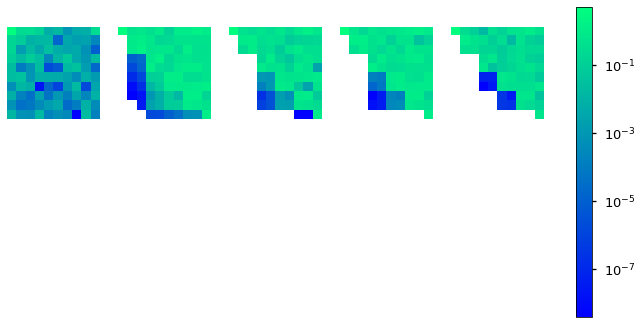

In [17]:
np.random.seed(12112019)
niter = 800
nprint = 5
niterprint = np.floor(niter / nprint)

A = np.random.rand(10,10)
#A = A + 1j * np.random.rand(10,10)
#A = A + A.T
X = A.copy()

ct = 0
f, ax = plt.subplots(2,nprint,sharey=True,figsize=(12,6))
for i in range(niter):
    Q, R = np.linalg.qr(X)
    X = R @ Q # X = Ak = Q.T A Q
    
    if i % niterprint == 0:
        
        I, J = np.where(np.abs(X) < 1e-13)
        Xtmp = X.copy()
        Xtmp[I,J] = 0.0
        
        im = ax[0,ct].imshow(np.abs(Xtmp.real), cmap=plt.cm.winter, norm=LogNorm())
        ax[0,ct].axis('off')
        
        if np.abs(Xtmp.imag).max() > 1e-13:
            im = ax[1,ct].imshow(np.abs(Xtmp.imag), cmap=plt.cm.winter, norm=LogNorm())
        ax[1,ct].axis('off')
        ct += 1
        
f.colorbar(im, ax=ax.ravel().tolist(), shrink=0.95)

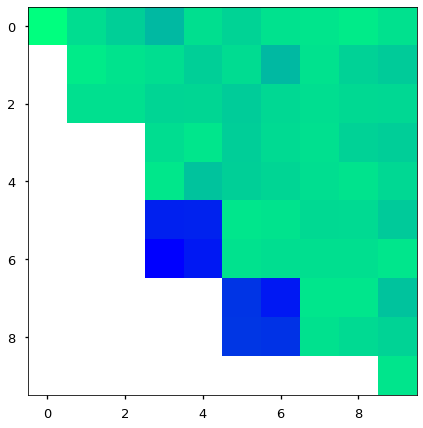

In [19]:
plt.imshow(np.abs(Xtmp.real), cmap=plt.cm.winter, norm=LogNorm())

In [20]:
np.linalg.eig(A)

(array([ 5.06+0.j  ,  0.59+0.j  ,  0.48+0.44j,  0.48-0.44j,  0.16+0.64j,
         0.16-0.64j, -0.68+0.31j, -0.68-0.31j, -0.43+0.46j, -0.43-0.46j]),
 array([[-0.27+0.j  ,  0.14+0.j  , -0.1 +0.18j, -0.1 -0.18j,  0.43+0.j  ,
          0.43-0.j  , -0.05+0.23j, -0.05-0.23j, -0.04-0.36j, -0.04+0.36j],
        [-0.32+0.j  , -0.42+0.j  , -0.17+0.05j, -0.17-0.05j,  0.21-0.19j,
          0.21+0.19j, -0.34-0.22j, -0.34+0.22j,  0.14+0.28j,  0.14-0.28j],
        [-0.35+0.j  ,  0.44+0.j  ,  0.21-0.01j,  0.21+0.01j, -0.06+0.19j,
         -0.06-0.19j,  0.57+0.j  ,  0.57-0.j  , -0.24-0.38j, -0.24+0.38j],
        [-0.31+0.j  ,  0.24+0.j  ,  0.02+0.4j ,  0.02-0.4j ,  0.23+0.28j,
          0.23-0.28j, -0.35-0.05j, -0.35+0.05j,  0.14+0.2j ,  0.14-0.2j ],
        [-0.3 +0.j  , -0.14+0.j  ,  0.2 -0.07j,  0.2 +0.07j,  0.32-0.25j,
          0.32+0.25j,  0.34-0.04j,  0.34+0.04j, -0.45+0.j  , -0.45-0.j  ],
        [-0.28+0.j  ,  0.49+0.j  ,  0.55+0.j  ,  0.55-0.j  , -0.08-0.31j,
         -0.08+0.31j, -0.37+0.06j

In [23]:
np.linalg.eig(X[1:3,1:3])

(array([-0.68+0.31j, -0.68-0.31j]),
 array([[0.83+0.j  , 0.83-0.j  ],
        [0.36-0.43j, 0.36+0.43j]]))

In [21]:
Xtmp[0,0]

5.056067638616204

In [22]:
Xtmp[9,9]

0.5875601310866426